# MiCM Workshop Series
# R - Beyond the Basics
## Efficient Coding
### - Yi Lian
### - March 7, 2020
__Link to workshop material__  https://github.com/ly129/MiCM2020

<a id='0'></a>
## Outline
1. [__An overview of efficiency__](#1)
    - General rules
    - R-specific rules
    - R object types (if necessary)
    - Record runtime of your code
2. [__Efficient coding__](#2)
    - Powerful functions in R
            - aggregate(), by(), apply() family
            - ifelse(), cut() and split()
    - Write our own functions in R
            - function()
    - Examples
         - Categorization, conditional operations, etc..
3. [__Exercises__](#3)

##### Important note! There are MANY advanced and powerful packages that do different things. There are too many and they are too diverse to be covered in this workshop.
___Here is a list of some awesome packages.___ https://awesome-r.com/

### 1.1 General rules
### 1.2 R-specific rules

### 1.3 R data types and structures
#### 1.3.1 R data types
    - numeric
        - integer
        - double precision (default)
    - logical
    - character
    - factor
    - ...

In [1]:
# double
class(5); is.double(5)

[1] "numeric"

[1] TRUE

In [2]:
class(5.0);
is.double(5.0)

[1] "numeric"

[1] TRUE

In [3]:
5L/2L

[1] 2.5

In [4]:
# integer
class(5L); is.double(5L)

[1] "integer"

[1] FALSE

In [5]:
# How precise is double precision?
options(digits = 22) # show more digits in output
print(1/3)
options(digits = 7) # back to the default

[1] 0.3333333333333333148296


In [6]:
object.size(rep(5, 5e6))
object.size(rep(5L, 5e6))

40000048 bytes

20000048 bytes

In [7]:
# logical
class(TRUE); class(F)

[1] "logical"

[1] "logical"

In [8]:
# character
class("TRUE")

[1] "character"

In [9]:
# Not important for this workshop
fac <- as.factor(c(1, 5, 11, 3))
fac

[1] 1  5  11 3 
Levels: 1 3 5 11

In [10]:
class(fac)

[1] "factor"

In [11]:
# R has an algorithm to decide the order of the levels
fac.ch <- as.factor(c("B", "a", "1", "ab", "b", "A"))
fac.ch

[1] B  a  1  ab b  A 
Levels: 1 a A ab b B

#### 1.3.2 R data structures
    - Scalar *
    - Vector
    - Matrix
    - Array
    - List
    - Data frame
    - ...

In [12]:
# Scalar - a vector of length 1
myscalar <- 5
myscalar

[1] 5

In [13]:
class(myscalar)

[1] "numeric"

In [14]:
# Vector
myvector <- c(1, 1, 2, 3, 5, 8)
myvector

[1] 1 1 2 3 5 8

In [15]:
class(myvector)

[1] "numeric"

In [16]:
# Matrix - a 2d array
mymatrix <- matrix(c(1, 1, 2, 3, 5, 8), nrow = 2, byrow = FALSE)
mymatrix

1,2,5
1,3,8


In [17]:
class(mymatrix)

[1] "matrix"

In [18]:
str(mymatrix)

 num [1:2, 1:3] 1 1 2 3 5 8


In [19]:
# Array - not important for this workshop
myarray <- array(c(1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144), dim = c(2, 2, 3))
print(myarray) # print() is not needed if run in R or Rstudio.

, , 1

     [,1] [,2]
[1,]    1    2
[2,]    1    3

, , 2

     [,1] [,2]
[1,]    5   13
[2,]    8   21

, , 3

     [,1] [,2]
[1,]   34   89
[2,]   55  144



In [20]:
class(myarray)

[1] "array"

In [21]:
# List - very important for the workshop
mylist <- list(Title = "R Beyond the Basics",
               Duration = c(2, 2),
               sections = as.factor(c(1, 2, 3, 4)),
               Date = as.Date("2020-03-06"),
               Lunch_provided = FALSE,
               Feedbacks = c("Amazing!", "Great workshop!", "Yi is the best!", "Wow!")
)
print(mylist) # No need for print if running in R or Rstudio

$Title
[1] "R Beyond the Basics"

$Duration
[1] 2 2

$sections
[1] 1 2 3 4
Levels: 1 2 3 4

$Date
[1] "2020-03-06"

$Lunch_provided
[1] FALSE

$Feedbacks
[1] "Amazing!"        "Great workshop!" "Yi is the best!" "Wow!"           



In [22]:
class(mylist)

[1] "list"

In [23]:
# Access data stored in lists
mylist$Title

[1] "R Beyond the Basics"

In [24]:
# or
mylist[[6]]

[1] "Amazing!"        "Great workshop!" "Yi is the best!" "Wow!"

In [25]:
# Further
mylist$Duration[1]
mylist[[6]][2]

[1] 2

[1] "Great workshop!"

In [26]:
# Elements in lists can have different data types
lapply(mylist, class) # We will talk about lapply() later

$Title
[1] "character"

$Duration
[1] "numeric"

$sections
[1] "factor"

$Date
[1] "Date"

$Lunch_provided
[1] "logical"

$Feedbacks
[1] "character"

In [27]:
# Elements in list can have different lengths
lapply(mylist, length)

$Title
[1] 1

$Duration
[1] 2

$sections
[1] 4

$Date
[1] 1

$Lunch_provided
[1] 1

$Feedbacks
[1] 4

In [28]:
# Data frames - most commonly used for analyses
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [29]:
# Access a column (variable) in data frames
mtcars$mpg

[1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

### 1.4 Time your program in R
___Illustrations of R rules for efficiency.___
        - proc.time(), system.time()
        - microbenchmark

#### 1.4.1 Vectorized operation vs. loop
__Example__
Calculate the square root of 1 to 1,000,000 using vectorized operation vs. using a for loop.

In [30]:
# Vectorized operation
# system.time(operation)  returns the time needed to run the 'operation'
t <- system.time( x1 <- sqrt(1:1000000) )
head(x1)

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490

In [31]:
# For loop with memory pre-allocation
x2 <- rep(NA, 1000000)
t0 <- proc.time()
for (i in 1:1000000) {
    x2[i] <- sqrt(i)
}
t1 <- proc.time()

identical(x1, x2) # Check whether results are the same

[1] TRUE

In [32]:
# For loop without memory pre-allocation
x3 <- NULL
t2 <- proc.time()
for (i in 1:1000000) {
    x3[i] <- sqrt(i)
}
t3 <- proc.time()

identical(x1, x2) # Check whether results are the sa

[1] TRUE

In [33]:
# As we can see, R is not very fast with loops.
t; t1 - t0; t3 - t2
# ?proc.time

   user  system elapsed 
  0.006   0.004   0.010 

   user  system elapsed 
  0.066   0.003   0.070 

   user  system elapsed 
  0.288   0.062   0.351 

##### How did R execute these three sets of codes?
The better we know how programming languages work, how computers work in general, the better codes we can write.
1. Vectorized
        x1 <- sqrt(1:1000000)
        
        - sqrt 1, sqrt 2, ..., sqrt 1e6
        - Save everything in x1 and put it in memory.
2. For loop with memory pre-allocation
        x2 <- rep(NA, 1000000)
        for (i in 1:1000000) { x2[i] <- sqrt(i) }

        - Make a vector x2 of length 1e6 and set all elements to NA.
        - Put it in memory.
        - Setup for loop.
        - 1st step
            - Find x2 in memory
            - Change the 1st element to sqrt 1
            - Put new x2 back in memory, delete old x2
        - 2nd step
            - Find x2 in memory
            - Change the 2nd element to sqrt 2
            - Put new x2 back in memory, delete old x2
        - ...
        - - 1e6th step
            - Find x2 in memory
            - Change the 1e6th element to sqrt 1e6
            - Put new x2 back in memory, delete old x2
3. For loop without memory pre-allocation
        x3 <- NULL
        for (i in 1:1000000) { x3[i] <- sqrt(i) }
 
        - Make an empty object x3 (NULL has length 0)
        - Put it in memory
        - Setup for loop.
        - 1st step
            - Find x3 in memory
            - Change the 1st element to .., wait x3 has length 0
            - Make a new x3 that has length 1
            - Change the 1st element to sqrt 1
            - Put new x3 back in memory.., wait
                The memory allocated for old x3 is not enough for new x3
            - Find some new space in memory for new x3
            - Put new x3 back in memory, delete old x3
        - 2nd step
            - Find x3 in memory
            - Change the 2nd element to .., wait x3 has length 1
            - Make a new x3 that has length 2
            - Copy the old x3 and paste as the first 1 element of new x3
            - Change the 2nd element to sqrt 2
            - Put new x3 back in memory.., wait
                The memory allocated for old x3 is not enough for new x3
            - Find some new space in memory for new x3
            - Put new x3 back in memory, delete old x3
        - ...
        - 1e6th step
            - Find x3 in memory
            - Change the 1e6th element to .., wait x3 has length 999999
            - Make a new x3 that has length 1e6
            - Copy the old x3 and paste as the first 999999 elements of new x3
            - Change the 1e6th element to sqrt 1e6
            - Put new x3 back in memory.., wait
                The memory allocated for old x3 is not enough for new x3
            - Find some new space in memory for new x3..
            - Put new x3 back in memory, delete old x3

##### Take-home message
- Use vectorized operations rather than loops for speed in R.
- Loops are more intuitive though.
- Balance between
    - speed
    - your need for speed
    - your level of comfortableness with linear algebra
    - your level of laziness
    - your typing speed
    - ...
- Based on what you are doing
    - dealing with big dataset and expensive calculations?
    - running the code only once or potentially many many times?

#### 1.4.2 Use established functions

__Example__
Calculate the square root using sqrt( ) vs. our own implementation.

In [34]:
# microbenchmark runs the code multiple times and take a summary
# Use well-developped R function
library(microbenchmark)
result <- microbenchmark(sqrt(500),
                         500^0.5,
                         unit = "ns", times = 1000
                        )
summary(result)
# Result in nanoseconds

expr,min,lq,mean,median,uq,max,neval
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sqrt(500),81,91,104.837,95,102,2968,1000
500^0.5,154,166,185.092,172,177,4313,1000


##### In summary, keep the rules in mind, know what you want to do, test your program, time your program.

<a id='2'></a>
## 2. [Efficient coding](#0)
R has many powerful and useful functions that we can use to achieve efficient coding and computing.
### 2.1 Powerful functions in R
##### Let's play with some data.

In [35]:
data <- read.csv("https://raw.githubusercontent.com/ly129/MiCM2020/master/sample.csv", header = TRUE)
head(data, 8)

X,Sex,Wr.Hnd,NW.Hnd,Pulse,Smoke,Height,Age
<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>
1,Male,21.4,21.0,63,Never,180.00,19.000
2,Male,19.5,19.4,79,Never,165.00,18.083
3,Female,16.3,16.2,44,Regul,152.40,23.500
4,Female,15.9,16.5,99,Never,167.64,17.333
5,Male,19.3,19.4,55,Never,180.34,19.833
6,Male,18.5,18.5,48,Never,167.00,22.333
7,Female,17.5,17.0,85,Heavy,163.00,17.667
8,Male,19.8,20.0,NA,Never,180.00,17.417


In [36]:
summary(data)

       X              Sex         Wr.Hnd          NW.Hnd          Pulse       
 Min.   :  1.00   Female:47   Min.   :13.00   Min.   :12.50   Min.   : 40.00  
 1st Qu.: 25.75   Male  :53   1st Qu.:17.50   1st Qu.:17.45   1st Qu.: 50.25  
 Median : 50.50               Median :18.50   Median :18.50   Median : 71.50  
 Mean   : 50.50               Mean   :18.43   Mean   :18.39   Mean   : 69.90  
 3rd Qu.: 75.25               3rd Qu.:19.50   3rd Qu.:19.52   3rd Qu.: 84.75  
 Max.   :100.00               Max.   :23.20   Max.   :23.30   Max.   :104.00  
                                                              NA's   :6       
   Smoke        Height           Age       
 Heavy: 6   Min.   :152.0   Min.   :16.92  
 Never:79   1st Qu.:166.4   1st Qu.:17.58  
 Occas: 5   Median :170.2   Median :18.46  
 Regul:10   Mean   :171.8   Mean   :20.97  
            3rd Qu.:179.1   3rd Qu.:20.21  
            Max.   :200.0   Max.   :73.00  
            NA's   :13                     

#### a1. Calculate the mean writing hand span of all individuals
    mean(x, trim = 0, na.rm = FALSE, ...)

In [37]:
mean(data$Wr.Hnd)

[1] 18.43

#### a2. Calculate the mean height of all individuals, exclude the missing values

In [38]:
mean(data$Height)

[1] NA

In [39]:
mean(data$Height, na.rm = TRUE)

[1] 171.7846

#### a3. Calculate the mean of all continuous variables
    apply(X, MARGIN, FUN, ...)

In [40]:
# Choose the continuous variables
var.cts <- sapply(data, FUN = is.numeric)
var.cts <- c("Wr.Hnd", "NW.Hnd", "Pulse", "Height", "Age")

cts.data <- data[, var.cts]
head(cts.data)

Wr.Hnd,NW.Hnd,Pulse,Height,Age
<dbl>,<dbl>,<int>,<dbl>,<dbl>
21.4,21.0,63,180.00,19.000
19.5,19.4,79,165.00,18.083
16.3,16.2,44,152.40,23.500
15.9,16.5,99,167.64,17.333
19.3,19.4,55,180.34,19.833
18.5,18.5,48,167.00,22.333


In [41]:
# Calculate the mean
apply(cts.data, MARGIN = 2, FUN = mean)

Wr.Hnd   NW.Hnd    Pulse   Height      Age 
18.43000 18.39100       NA       NA 20.96503

In [42]:
apply(cts.data, MARGIN = 2, FUN = mean, na.rm = TRUE)

Wr.Hnd    NW.Hnd     Pulse    Height       Age 
 18.43000  18.39100  69.90426 171.78460  20.96503

#### b1. Calculate the count/proportion of females and males
    table(...,
      exclude = if (useNA == "no") c(NA, NaN),
      useNA = c("no", "ifany", "always"),
      dnn = list.names(...), deparse.level = 1)

    prop.table()

In [43]:
sex.tab <- table(data$Sex)
sex.tab


Female   Male 
    47     53 

In [44]:
prop.table(sex.tab)


Female   Male 
  0.47   0.53 

#### b2. Calculate the count in each Smoke group

In [45]:
table(data$Smoke)


Heavy Never Occas Regul 
    6    79     5    10 

#### b3. Calculate the count and proportion of males and females in each Smoke group

In [46]:
table(data$Sex, data$Smoke)

        
         Heavy Never Occas Regul
  Female     3    40     3     1
  Male       3    39     2     9

In [47]:
ss.tab <- table(data[, c("Sex", "Smoke")])
ss.tab

        Smoke
Sex      Heavy Never Occas Regul
  Female     3    40     3     1
  Male       3    39     2     9

In [48]:
prop.table(ss.tab, margin = 2)

        Smoke
Sex          Heavy     Never     Occas     Regul
  Female 0.5000000 0.5063291 0.6000000 0.1000000
  Male   0.5000000 0.4936709 0.4000000 0.9000000

In [49]:
prop.table(ss.tab, margin = 1)

        Smoke
Sex           Heavy      Never      Occas      Regul
  Female 0.06382979 0.85106383 0.06382979 0.02127660
  Male   0.05660377 0.73584906 0.03773585 0.16981132

In [50]:
sample(letters[1:3], size = 100, replace = T)

[1] "c" "b" "c" "b" "c" "b" "c" "c" "c" "b" "a" "b" "a" "c" "c" "a" "c" "a"
 [19] "c" "b" "a" "a" "a" "b" "c" "a" "a" "c" "a" "c" "a" "c" "c" "b" "c" "b"
 [37] "a" "a" "c" "b" "c" "b" "b" "c" "a" "c" "b" "c" "c" "a" "b" "c" "c" "b"
 [55] "a" "a" "c" "c" "a" "b" "c" "c" "c" "b" "a" "a" "c" "a" "c" "c" "c" "c"
 [73] "b" "a" "a" "a" "c" "a" "a" "c" "c" "b" "a" "b" "b" "a" "c" "a" "b" "b"
 [91] "a" "a" "c" "c" "a" "b" "c" "a" "a" "b"

In [51]:
tab3d <- table(data$Sex, data$Smoke,
               sample(letters[1:3], size = 100, replace = T))
tab3d

, ,  = a

        
         Heavy Never Occas Regul
  Female     2    17     1     0
  Male       0     9     1     2

, ,  = b

        
         Heavy Never Occas Regul
  Female     1    15     0     0
  Male       2    17     0     3

, ,  = c

        
         Heavy Never Occas Regul
  Female     0     8     2     1
  Male       1    13     1     4


In [52]:
prop.table(tab3d, margin = c(1,3))

, ,  = a

        
              Heavy      Never      Occas      Regul
  Female 0.10000000 0.85000000 0.05000000 0.00000000
  Male   0.00000000 0.75000000 0.08333333 0.16666667

, ,  = b

        
              Heavy      Never      Occas      Regul
  Female 0.06250000 0.93750000 0.00000000 0.00000000
  Male   0.09090909 0.77272727 0.00000000 0.13636364

, ,  = c

        
              Heavy      Never      Occas      Regul
  Female 0.00000000 0.72727273 0.18181818 0.09090909
  Male   0.05263158 0.68421053 0.05263158 0.21052632


#### c1. Calculate the standard deviation of writing hand span of females
        aggregate()
        tapply()
        by()

In [53]:
# Subset if we don't know these functions yet..
data.f <- data[data$Sex == "Female", ]
head(data.f)
sd(data.f$Wr.Hnd)

,X,Sex,Wr.Hnd,NW.Hnd,Pulse,Smoke,Height,Age
,<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>
3,3,Female,16.3,16.2,44,Regul,152.40,23.500
4,4,Female,15.9,16.5,99,Never,167.64,17.333
7,7,Female,17.5,17.0,85,Heavy,163.00,17.667
9,9,Female,13.0,12.5,77,Never,165.00,18.167
10,10,Female,18.5,18.0,75,Never,173.00,18.250
11,11,Female,17.5,17.1,73,Never,167.00,18.417


[1] 1.519908

In [54]:
# aggregate() syntax 1
aggregate(data$Wr.Hnd, by = list(sex = data$Sex), FUN = sd)

sex,x
<fct>,<dbl>
Female,1.519908
Male,1.712066


In [55]:
# aggregate() syntax 2
aggregate(Wr.Hnd~Sex, data = data, FUN = sd)

Sex,Wr.Hnd
<fct>,<dbl>
Female,1.519908
Male,1.712066


In [56]:
# by()
by(data = data$Wr.Hnd, INDICES = list(sex = data$Sex), FUN = sd)

sex: Female
[1] 1.519908
------------------------------------------------------------ 
sex: Male
[1] 1.712066

In [57]:
# tapply()
tapply(X = data$Wr.Hnd, INDEX = list(data$Sex), FUN = sd)

Female     Male 
1.519908 1.712066

In [58]:
# Return a list using tapply()
tapply(X = data$Wr.Hnd, INDEX = list(data$Sex),
       FUN = sd, simplify = FALSE)

$Female
[1] 1.519908

$Male
[1] 1.712066

##### aggregate( ), by( ) and tapply( ) are all connected. They give different types of output.

#### c2. Calculate the standard deviation of writing hand span of all different Sex-Smoke groups

In [59]:
aggregate(data$Wr.Hnd,
          by = list(sex = data$Sex, smoke = data$Smoke),
          FUN = sd)

sex,smoke,x
<fct>,<fct>,<dbl>
Female,Heavy,0.2309401
Male,Heavy,4.8569538
Female,Never,1.5762663
Male,Never,1.3857770
Female,Occas,1.9000000
Male,Occas,2.2627417
Female,Regul,NA
Male,Regul,1.6537835


In [60]:
aggregate(Wr.Hnd~Sex+Smoke, data = data, FUN = sd)

Sex,Smoke,Wr.Hnd
<fct>,<fct>,<dbl>
Female,Heavy,0.2309401
Male,Heavy,4.8569538
Female,Never,1.5762663
Male,Never,1.3857770
Female,Occas,1.9000000
Male,Occas,2.2627417
Female,Regul,NA
Male,Regul,1.6537835


#### c3. Calculate the standard deviation of writing hand and non-writing hand span of all Sex-Smoke groups

In [61]:
cbind(1:5, 5:1); rbind(1:5, 5:1)

1,5
2,4
3,3
4,2
5,1


1,2,3,4,5
5,4,3,2,1


In [62]:
aggregate(cbind(data$Wr.Hnd, data$NW.Hnd),
          by = list(data$Sex, data$Smoke),
          FUN = sd)

Group.1,Group.2,V1,V2
<fct>,<fct>,<dbl>,<dbl>
Female,Heavy,0.2309401,0.2886751
Male,Heavy,4.8569538,3.9828800
Female,Never,1.5762663,1.6625899
Male,Never,1.3857770,1.3760875
Female,Occas,1.9000000,1.3796135
Male,Occas,2.2627417,1.0606602
Female,Regul,NA,NA
Male,Regul,1.6537835,1.3991069


In [63]:
aggregate(cbind(Wr.Hnd, NW.Hnd)~Sex+Smoke, data = data, FUN = sd)

Sex,Smoke,Wr.Hnd,NW.Hnd
<fct>,<fct>,<dbl>,<dbl>
Female,Heavy,0.2309401,0.2886751
Male,Heavy,4.8569538,3.9828800
Female,Never,1.5762663,1.6625899
Male,Never,1.3857770,1.3760875
Female,Occas,1.9000000,1.3796135
Male,Occas,2.2627417,1.0606602
Female,Regul,NA,NA
Male,Regul,1.6537835,1.3991069


##### Let's try to figure out what aggregate( ) is doing
        print()

In [64]:
aggregate(Wr.Hnd~Smoke, data = data, FUN = print)

[1] 17.5 14.0 23.2 17.5 17.1 21.3
 [1] 21.4 19.5 15.9 19.3 18.5 19.8 13.0 18.5 17.5 22.0 20.0 18.6 16.0 13.0 18.0
[16] 19.6 21.0 17.5 19.5 18.9 18.1 16.0 18.8 19.5 16.4 18.5 17.2 19.4 17.0 17.8
[31] 18.0 16.9 21.0 16.5 17.0 18.5 17.6 16.5 19.1 18.8 17.7 15.5 21.0 18.0 19.0
[46] 17.6 19.5 21.5 20.8 19.0 18.9 17.5 19.0 18.5 18.5 19.2 15.0 17.7 17.5 16.0
[61] 18.5 17.5 18.0 18.0 19.0 18.5 19.2 21.5 17.5 17.5 19.5 17.6 18.7 17.0 18.2
[76] 18.0 19.5 19.5 20.5
[1] 19.1 22.2 15.4 16.5 19.0
 [1] 16.3 18.5 19.5 19.7 18.0 17.0 22.5 20.5 20.0 21.0


Smoke,Wr.Hnd
<fct>,<list>
Heavy,"17.5, 14.0, 23.2, 17.5, 17.1, 21.3"
Never,"21.4, 19.5, 15.9, 19.3, 18.5, 19.8, 13.0, 18.5, 17.5, 22.0, 20.0, 18.6, 16.0, 13.0, 18.0, 19.6, 21.0, 17.5, 19.5, 18.9, 18.1, 16.0, 18.8, 19.5, 16.4, 18.5, 17.2, 19.4, 17.0, 17.8, 18.0, 16.9, 21.0, 16.5, 17.0, 18.5, 17.6, 16.5, 19.1, 18.8, 17.7, 15.5, 21.0, 18.0, 19.0, 17.6, 19.5, 21.5, 20.8, 19.0, 18.9, 17.5, 19.0, 18.5, 18.5, 19.2, 15.0, 17.7, 17.5, 16.0, 18.5, 17.5, 18.0, 18.0, 19.0, 18.5, 19.2, 21.5, 17.5, 17.5, 19.5, 17.6, 18.7, 17.0, 18.2, 18.0, 19.5, 19.5, 20.5"
Occas,"19.1, 22.2, 15.4, 16.5, 19.0"
Regul,"16.3, 18.5, 19.5, 19.7, 18.0, 17.0, 22.5, 20.5, 20.0, 21.0"


##### Exercise.
- Repeat b1-b3 using aggregate( )

In [65]:
aggregate(Wr.Hnd~Smoke, data = data, FUN = length)

Smoke,Wr.Hnd
<fct>,<int>
Heavy,6
Never,79
Occas,5
Regul,10


- Make histograms of writing hand span for all four Smoke groups using aggregate( )
        hist()

Smoke,Wr.Hnd
<fct>,"<list[,6]>"
Heavy,"10, 15, 20, 25, 1, 3, 2, 0.03333333, 0.10000000, 0.06666667, 12.5, 17.5, 22.5, X[[i]], TRUE"
Never,"10, 15, 20, 25, 3, 67, 9, 0.007594937, 0.169620253, 0.022784810, 12.5, 17.5, 22.5, X[[i]], TRUE"
Occas,"14, 16, 18, 20, 22, 24, 1, 1, 2, 0, 1, 0.1, 0.1, 0.2, 0.0, 0.1, 15, 17, 19, 21, 23, X[[i]], TRUE"
Regul,"16, 18, 20, 22, 24, 3, 4, 2, 1, 0.15, 0.20, 0.10, 0.05, 17, 19, 21, 23, X[[i]], TRUE"


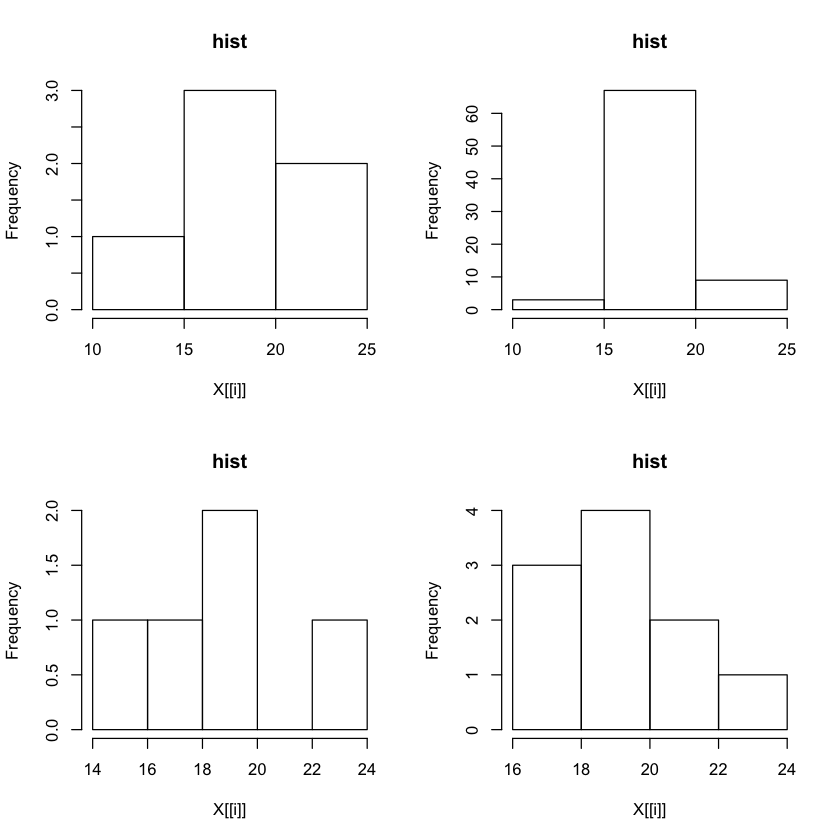

In [66]:
par(mfrow = c(2,2))
aggregate(Wr.Hnd~Smoke, data = data, FUN = hist,
          main = "hist", breaks = 3)

#### d1. Categorize 'Age' - make a new binary variable 'Adult'
    ifelse(test, yes, no)

In [67]:
vec <- 1:5
vec

ifelse(vec>3, yes = "big", no = "small")

[1] 1 2 3 4 5

[1] "small" "small" "small" "big"   "big"

In [68]:
data$Adult <- ifelse(data$Age >= 18, yes = "Yes", no = "No")

##### R has if (test) {opt1} else {opt2}, what is the advantage of ifelse( )?

In [69]:
if (data$Age >= 18) {
    data$Adult2 = "Yes"
} else {
    data$Adult2 = "No"
}
head(data)

Warning message in if (data$Age >= 18) {:
“the condition has length > 1 and only the first element will be used”

X,Sex,Wr.Hnd,NW.Hnd,Pulse,Smoke,Height,Age,Adult,Adult2
<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<chr>,<chr>
1,Male,21.4,21.0,63,Never,180.00,19.000,Yes,Yes
2,Male,19.5,19.4,79,Never,165.00,18.083,Yes,Yes
3,Female,16.3,16.2,44,Regul,152.40,23.500,Yes,Yes
4,Female,15.9,16.5,99,Never,167.64,17.333,No,Yes
5,Male,19.3,19.4,55,Never,180.34,19.833,Yes,Yes
6,Male,18.5,18.5,48,Never,167.00,22.333,Yes,Yes


In [70]:
# Delete Adult2
data <- subset(data, select=-c(Adult2))

##### ifelse( ) is vectorized!!!
#### d2. Categorize 'Wr.Hnd' into 5 groups - make a new categorical variable with 5 levels
    1. =< 16: TP/XS
    2. 16~18 (16,18]: P/S
    3. 18~20 (18,20]: M/M
    4. 20~22: G/L
    5. >  22: TG/XL
Can we still use ifelse( )?
    
    cut(x, breaks, labels = NULL, right = TRUE, ...)

In [71]:
cut.points <- c(-Inf, 16, 18, 20, 22, Inf)

data$Hn.Grp <- cut(data$Wr.Hnd, breaks = cut.points, right = T)

head(data, 12)
# labels as default

X,Sex,Wr.Hnd,NW.Hnd,Pulse,Smoke,Height,Age,Adult,Hn.Grp
<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<chr>,<fct>
1,Male,21.4,21.0,63,Never,180.00,19.000,Yes,"(20,22]"
2,Male,19.5,19.4,79,Never,165.00,18.083,Yes,"(18,20]"
3,Female,16.3,16.2,44,Regul,152.40,23.500,Yes,"(16,18]"
4,Female,15.9,16.5,99,Never,167.64,17.333,No,"(-Inf,16]"
5,Male,19.3,19.4,55,Never,180.34,19.833,Yes,"(18,20]"
6,Male,18.5,18.5,48,Never,167.00,22.333,Yes,"(18,20]"
7,Female,17.5,17.0,85,Heavy,163.00,17.667,No,"(16,18]"
8,Male,19.8,20.0,NA,Never,180.00,17.417,No,"(18,20]"
9,Female,13.0,12.5,77,Never,165.00,18.167,Yes,"(-Inf,16]"


In [72]:
# Set labels to false
data$Hn.Grp <- cut(data$Wr.Hnd, breaks = cut.points, labels = F)
head(data)

X,Sex,Wr.Hnd,NW.Hnd,Pulse,Smoke,Height,Age,Adult,Hn.Grp
<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<chr>,<int>
1,Male,21.4,21.0,63,Never,180.00,19.000,Yes,4
2,Male,19.5,19.4,79,Never,165.00,18.083,Yes,3
3,Female,16.3,16.2,44,Regul,152.40,23.500,Yes,2
4,Female,15.9,16.5,99,Never,167.64,17.333,No,1
5,Male,19.3,19.4,55,Never,180.34,19.833,Yes,3
6,Male,18.5,18.5,48,Never,167.00,22.333,Yes,3


In [73]:
# Customized labels
custom.label <- c("TP/XS", "P/S", "M/M", "G/L", "TG/XL")
data$Hn.Grp <- cut(data$Wr.Hnd, breaks = cut.points,
                   right = T, labels = custom.label)
head(data)

X,Sex,Wr.Hnd,NW.Hnd,Pulse,Smoke,Height,Age,Adult,Hn.Grp
<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<chr>,<fct>
1,Male,21.4,21.0,63,Never,180.00,19.000,Yes,G/L
2,Male,19.5,19.4,79,Never,165.00,18.083,Yes,M/M
3,Female,16.3,16.2,44,Regul,152.40,23.500,Yes,P/S
4,Female,15.9,16.5,99,Never,167.64,17.333,No,TP/XS
5,Male,19.3,19.4,55,Never,180.34,19.833,Yes,M/M
6,Male,18.5,18.5,48,Never,167.00,22.333,Yes,M/M


#### e1. Calculate the mean Wr.Hnd span of each Hnd.group

In [74]:
aggregate(Wr.Hnd~Hn.Grp, data = data, FUN = mean)

Hn.Grp,Wr.Hnd
<fct>,<dbl>
TP/XS,14.98000
P/S,17.37941
M/M,19.04634
G/L,21.12500
TG/XL,22.63333


#### e2. Calcuate the mean Wr.Hnd span of each Hnd.group without using aggregate, by, tapply
        split(x, f, ...)
        lapply(X, FUN, ...)
        sapply(X, FUN, ..., simplify = TRUE)

In [75]:
numbers <- 1:10
groups <- sample(letters[1:3], size = 10, replace = T)
rbind(numbers, groups)

numbers,1,2,3,4,5,6,7,8,9,10
groups,c,b,c,a,a,c,b,b,b,c


In [76]:
split(x = numbers, f = groups)

$a
[1] 4 5

$b
[1] 2 7 8 9

$c
[1]  1  3  6 10

In [77]:
wr.hnd.grp <- split(data$Wr.Hnd, f = data$Hn.Grp)
wr.hnd.grp

$`TP/XS`
 [1] 15.9 13.0 16.0 13.0 14.0 16.0 15.5 15.4 15.0 16.0

$`P/S`
 [1] 16.3 17.5 17.5 18.0 17.5 16.4 17.2 17.0 17.8 18.0 18.0 17.0 16.9 16.5 17.0
[16] 17.6 16.5 17.5 17.7 17.1 18.0 17.6 17.5 17.7 17.5 17.5 18.0 18.0 16.5 17.5
[31] 17.5 17.6 17.0 18.0

$`M/M`
 [1] 19.5 19.3 18.5 19.8 18.5 20.0 18.6 18.5 19.1 19.6 19.5 19.5 18.9 18.1 19.7
[16] 18.8 19.5 18.5 19.4 18.5 19.1 18.8 20.0 19.0 19.5 19.0 18.9 19.0 18.5 18.5
[31] 19.2 18.5 19.0 18.5 19.2 19.5 18.7 18.2 19.5 19.0 19.5

$`G/L`
 [1] 21.4 22.0 21.0 21.0 20.5 21.0 21.5 20.8 21.3 21.5 21.0 20.5

$`TG/XL`
[1] 22.2 23.2 22.5

In [78]:
# lapply
la <- lapply(X = wr.hnd.grp, FUN = mean);
la

$`TP/XS`
[1] 14.98

$`P/S`
[1] 17.37941

$`M/M`
[1] 19.04634

$`G/L`
[1] 21.125

$`TG/XL`
[1] 22.63333

In [79]:
# sapply
sapply(X = wr.hnd.grp, FUN = mean, simplify = T)

TP/XS      P/S      M/M      G/L    TG/XL 
14.98000 17.37941 19.04634 21.12500 22.63333

In [80]:
sapply(X = wr.hnd.grp, FUN = mean, simplify = F)

$`TP/XS`
[1] 14.98

$`P/S`
[1] 17.37941

$`M/M`
[1] 19.04634

$`G/L`
[1] 21.125

$`TG/XL`
[1] 22.63333

In [81]:
summary(1:10)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.25    5.50    5.50    7.75   10.00 

In [82]:
# vapply *
# Safer than sapply(), and a little bit faster
# because FUN.VALUE has to be specified that length and type should match

va <- vapply(wr.hnd.grp, summary, FUN.VALUE = c("Min." = numeric(1),
                                                "1st Qu." = numeric(1),
                                                "Median" = numeric(1),
                                                "Mean" = numeric(1),
                                                "3rd Qu." = numeric(1),
                                                "Max." = numeric(1)))
va

,TP/XS,P/S,M/M,G/L,TG/XL
Min.,13.000,16.30000,18.10000,20.500,22.20000
1st Qu.,14.250,17.00000,18.50000,20.950,22.35000
Median,15.450,17.50000,19.00000,21.000,22.50000
Mean,14.980,17.37941,19.04634,21.125,22.63333
3rd Qu.,15.975,17.70000,19.50000,21.425,22.85000
Max.,16.000,18.00000,20.00000,22.000,23.20000


#### f. Calculate the 95% sample confidence intervals of Wr.Hnd in each Smoke group.
One variable for lower bound and one variable for upper bound.

$$ CI = \bar{x} \pm t_{n-1, 0.025} \times \sqrt{\frac{s^2}{n}} $$

where $\bar{x}$ is the sample mean and $s^2$ is the sample variance.

In [83]:
# aggregate(Wr.Hnd~Smoke, data = data, FUN = ...)
# tapply(X = data$Wr.Hnd, INDEX = list(data$Smoke), FUN = ...)

##### Unfortunately, I do not know any function in R that does this calculation.
But we know how to do it step by step.

In [84]:
sample.mean <- aggregate(Wr.Hnd~Smoke, data = data, FUN = mean)[,2]
sample.var <- aggregate(Wr.Hnd~Smoke, data = data, FUN = var)[,2]
sample.size <- aggregate(Wr.Hnd~Smoke, data = data, FUN = length)[,2]

# sample.mean; sample.var; sample.size

t <- qt(p = 0.025, df = sample.size - 1, lower.tail = FALSE)

lb <- sample.mean - t * sqrt(sample.var/sample.size); lb
ub <- sample.mean + t * sqrt(sample.var/sample.size); ub


# How many times did we aggregate according to the group?
# Can we aggregate only once?

[1] 14.98092 17.93922 15.16121 17.95364

[1] 21.88575 18.69875 21.71879 20.64636

##### Or, we can make our own function and integrate it into aggregate( ), by( ), or tapply( ) !!!
### 2.2 Write our own functions in R
A function takes in some arguments and gives some outputs

Arguments include
    - inputs
    - options

In [85]:
# The structure
func_name <- function(argument){
    statement
}

#### Example 1. Make a function for $f(x) = 2x$

In [86]:
# Build the function
times2 <- function(x) {
    fx <- 2 * x
    return(fx)
}
# Use the function
times2(x = 5)
# or
times2(3)

[1] 10

[1] 6

#### Example 2. Make a function to calculate the integer division of $a$ by $b$, return the integer part and the modulus.

In [87]:
# R has operators that do this
9 %/% 2
9 %% 2

[1] 4

[1] 1

     floor( ) takes a single numeric argument x and returns a numeric vector containing the largest integers not greater than the corresponding elements of x.



In [88]:
int.div <- function(a, b){
    int <- floor(a/b)
    mod <- a - int*b
    return(list(integer = int, modulus = mod))
}

In [89]:
# class(result)
# Recall: how do we access the modulus?
result <- int.div(21, 4)
result

$integer
[1] 5

$modulus
[1] 1

In [90]:
int.div <- function(a, b){
    int <- a%/%b
    mod <- a%%b
    return(cat(a, "%%", b, ": \n integer =", int,"\n ------------------", " \n modulus =", mod, "\n"))
}
int.div(33,5)

33 %% 5 : 
 integer = 6 
 ------------------  
 modulus = 3 


In [91]:
int.div <- function(a, b){
    int <- a%/%b
    mod <- a%%b
    out <- rbind(a, b, int, mod)
    out
}
int.div(21:25, 1:5)

a,21,22,23,24,25
b,1,2,3,4,5
int,21,11,7,6,5
mod,0,0,2,0,0


#### Example 3. Make the simplest canadian AI chatbot
A function can return something other than an R object, say some voice.

In [92]:
# No need to worry about the details here.
# Just want to show that functions do not always have to return() something.
AIcanadian <- function(who, reply_to) {
    system(paste("say -v", who, "Sorry!"))
}
# AIcanadian("Alex", "Sorry I stepped on your foot.")

In [93]:
# Train my chatbot - AlphaGo style.
# I'll let Alex and Victoria talk to each other.
# MacOS has their voices recorded.
# chat_log <- rep(NA, 8)
# for (i in 1:8) {
#     if (i == 1) {
#         chat_log[1] <- "Sorry I stepped on your foot."
#         system("say -v Victoria Sorry, I stepped on your foot.")
#     } else {
#         if (i %% 2 == 0)
#             chat_log[i] <- AIcanadian("Alex", chat_log[i - 1])
#         else
#             chat_log[i] <- AIcanadian("Victoria", chat_log[i - 1])
#     }
# }
# chat_log

#### Example 4. Check one summary statistic by Smoke group of our 'data' data.
Function arguments can be basically anything, say another function.

In [94]:
data_summary <- function(func) {
    data <- read.csv("https://raw.githubusercontent.com/ly129/MiCM2020/master/sample.csv", header = TRUE)
    by(data = data$Wr.Hnd, INDICES = list(data$Smoke), FUN = func)
}
data_summary(mean)

: Heavy
[1] 18.43333
------------------------------------------------------------ 
: Never
[1] 18.31899
------------------------------------------------------------ 
: Occas
[1] 18.44
------------------------------------------------------------ 
: Regul
[1] 19.3

#### Example 5. Default argument value & stop execution & warning message

In [95]:
a_times_2_unless_you_want.something.else.but.I.refuse.3 <- function(a, b=2){
    if (b == 3) {
        stop("I refuse 3!")
    }
    
    if (b == 4) {
        warning("4 sucks too.")
    }
    
    a*b
}

In [96]:
a_times_2_unless_you_want.something.else.but.I.refuse.3(a = 5)

[1] 10

In [97]:
a_times_2_unless_you_want.something.else.but.I.refuse.3(a = 5, b = 4)

Warning message in a_times_2_unless_you_want.something.else.but.I.refuse.3(a = 5, :
“4 sucks too.”

[1] 20

In [118]:
a_times_2_unless_you_want.something.else.but.I.refuse.3(a = 5, b = 3)

ERROR: Error in a_times_2_unless_you_want.something.else.but.I.refuse.3(a = 5, : I refuse 3!


In [99]:
# Multiple optional arguments fed to different functions called in our own function
# Still needs a lot of refinement

fancy.mean <- function(vec, ...) {
    args <- list(...)
    print(args)
#     print(as.list(match.call(expand.dots = FALSE)))
    mean.args <- c("trim", "na.rm")
    sample.args <- c("size", "replace", "prob")
    
# Could use a for loop to go over all args.
    
#     cat("arguments in mean()", mean.args, "\n")
    
    args.names <- names(args)
    
#     cat("argument names in ...", args.names, "\n")
    
    m.args <- args.names[args.names %in% mean.args]
    s.args <- args.names[args.names %in% sample.args]
    
#     cat("args names that will be used in mean", m.args, "\n")
    
    print(args[["m.args"]])
    m <- list(trim = 0, na.rm = args[[m.args]])
    s <- list(args[[s.args]], replace = FALSE, prob = NULL)
    
#     print(m)
#     print("args that will be used in mean", m, "\n")
    
    fancy.mean <- mean(vec, trim = 0, na.rm = args[[m.args]])
    fancy.sample <- sample(vec, size = args[[s.args]])
    return(list(fancy.mean,fancy.sample))
}

In [100]:
fancy.mean(c(1:5, NA, NA, 234,123,4,123,41,234),
           na.rm = T, size = 1)

$na.rm
[1] TRUE

$size
[1] 1

NULL


[[1]]
[1] 70.36364

[[2]]
[1] 234

##### Exercise: 
- Make a function to calculate sample confidence intervals (2.1 f)

In [101]:
sample.ci <- function(x, digits = 2) {
    mu <- mean(x)
    variance <- var(x)
    size <- length(x)
    t.stat <- qt(p = 0.025, df = size - 1, lower.tail = FALSE)
    
    lb <- mu - t.stat * sqrt(variance/size)
    ub <- mu + t.stat * sqrt(variance/size)
    
    return(round(c(lower = lb, upper = ub), digits))
    
    # Think carefully whether this output can be put
    # inside of a data.frame
}

- Use the function in 1 with aggregate( ), by( ) or apply( ) to calculate the sample confidence intervals (2.1 f)

In [102]:
aggregate(Wr.Hnd~Smoke, data = data, FUN = sample.ci)

Smoke,Wr.Hnd
<fct>,"<dbl[,2]>"
Heavy,"14.98, 21.89"
Never,"17.94, 18.70"
Occas,"15.16, 21.72"
Regul,"17.95, 20.65"


<a id='3'></a>
## 3. [Exercises](#0)

A fake dataset is generated. Results should make no biological sense.

In [103]:
set.seed(20200306)
N <- 200
height <- round(rnorm(n = N, mean = 180, sd = 10)) # in centimeter
weight <- round(rnorm(n = N, mean = 80, sd = 10)) # in kilograms
age <- round(rnorm(n = N, mean = 50, sd = 10))
treatment <- sample(c(TRUE, FALSE), size = N,
                    replace = T, prob = c(0.3,0.7))
HF <- sample(c(TRUE, FALSE), size = N, replace = T,
             prob = c(0.1,0.9))

fake <- data.frame(height, weight, age, treatment, HF)
head(fake)

height,weight,age,treatment,HF
<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
186,92,60,FALSE,FALSE
155,74,58,FALSE,TRUE
182,79,62,FALSE,FALSE
178,101,54,FALSE,FALSE
182,72,54,FALSE,FALSE
159,66,41,FALSE,TRUE


#### 1. (Vectorized operation) Calculate BMI for every individual 
$\mathrm{BMI} = \mathrm{weight}(kg)/\mathrm{height}(m)^2$

In [104]:
names(fake)
fake$BMI <- fake$weight/(fake$height/100)^2
head(fake)

[1] "height"    "weight"    "age"       "treatment" "HF"

height,weight,age,treatment,HF,BMI
<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>
186,92,60,FALSE,FALSE,26.59267
155,74,58,FALSE,TRUE,30.80125
182,79,62,FALSE,FALSE,23.84978
178,101,54,FALSE,FALSE,31.87729
182,72,54,FALSE,FALSE,21.73651
159,66,41,FALSE,TRUE,26.10656


#### 2. (Categorization) BMI Categories: 
    - Underweight = <18.5
    - Normal weight = 18.5–24.9 
    - Overweight = 25–29.9 
    - Obesity = BMI of 30 or greater

In [105]:
cut.pts <- c(-Inf, 18.5, 25, 30, Inf)
labs <- c("Underweight", "Normal weight", "Overweight", "Obesity")
fake$BMI.cat <- cut(fake$BMI, breaks = cut.pts, labels = labs, right = F)
head(fake)

height,weight,age,treatment,HF,BMI,BMI.cat
<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<fct>
186,92,60,FALSE,FALSE,26.59267,Overweight
155,74,58,FALSE,TRUE,30.80125,Obesity
182,79,62,FALSE,FALSE,23.84978,Normal weight
178,101,54,FALSE,FALSE,31.87729,Obesity
182,72,54,FALSE,FALSE,21.73651,Normal weight
159,66,41,FALSE,TRUE,26.10656,Overweight


#### 3. (*apply) Mean BMI of each BMI group

In [106]:
# aggregate()
aggregate(BMI~BMI.cat, data = fake, FUN = mean)

BMI.cat,BMI
<fct>,<dbl>
Underweight,16.17253
Normal weight,22.09822
Overweight,26.94884
Obesity,32.79935


In [107]:
# split() and lapply()
BMI.grp <- split(fake$BMI, f = fake$BMI.cat)
lapply(BMI.grp, FUN = mean)

$Underweight
[1] 16.17253

$`Normal weight`
[1] 22.09822

$Overweight
[1] 26.94884

$Obesity
[1] 32.79935

#### 4. (Aggregation) Proportion with heart failure in each BMI-treatment group

In [108]:
# Trick:
FALSE+TRUE+TRUE

[1] 2

In [109]:
aggregate(HF~BMI.cat+treatment, data = fake, FUN = sum)

BMI.cat,treatment,HF
<fct>,<lgl>,<int>
Underweight,FALSE,0
Normal weight,FALSE,9
Overweight,FALSE,3
Obesity,FALSE,4
Underweight,TRUE,1
Normal weight,TRUE,5
Overweight,TRUE,2
Obesity,TRUE,0


#### 5. Write a function that allow user to specify
    - a dataset
    - the (binary) treatment variable
    - the (binary) outcome variable
    
#### and return a cross-tabulation (a 2x2 table).

In [110]:
tab2by2 <- function(data, treatment, outcome){
    sub <- data[, c(treatment, outcome)]
    return(table(sub))
}

In [111]:
tab2by2(fake, treatment = "treatment", outcome = "HF")

         HF
treatment FALSE TRUE
    FALSE   130   16
    TRUE     46    8

#### 5 Pro. The function should be able to check whether the treatment/outcome variables are binary or not. Continuous variables will be dichotomized based on a user-defined threshold.

In [112]:
tab2by2.pro <- function(data, treatment, outcome, treatment.threshold, outcome.threshold){
    tx <- data[, treatment]
    rx <- data[, outcome]
    
    if (length(table(tx))>2) {
        if (missing(treatment.threshold)) {
            stop("Non-binary treatment. Please provide a threshold.")
        } else {
            binary.treatment <- ifelse(tx<=treatment.threshold,
                                       yes = paste("<=", treatment.threshold),
                                       no = paste(">", treatment.threshold))
        }
    } else {
        binary.treatment <- tx
    }
    
    if (length(table(rx))>2) {
        if (missing(outcome.threshold)) {
            stop("Non-binary outcome. Please provide a threshold.")
        } else {
            binary.outcome <- ifelse(rx<=outcome.threshold,
                                     yes = paste("<=", outcome.threshold),
                                     no = paste(">", outcome.threshold))
        }
    } else {
        binary.outcome <- rx
    }
    
    
    return(table(treatment = binary.treatment, outcome = binary.outcome))
}

In [113]:
tab2by2.pro(fake, treatment = "age", outcome = "BMI")

ERROR: Error in tab2by2.pro(fake, treatment = "age", outcome = "BMI"): Non-binary treatment. Please provide a threshold.


In [114]:
tab2by2.pro(fake, treatment = "age", outcome = "BMI", treatment.threshold = 50)

ERROR: Error in tab2by2.pro(fake, treatment = "age", outcome = "BMI", treatment.threshold = 50): Non-binary outcome. Please provide a threshold.


In [115]:
tab2by2.pro(fake, treatment = "age", outcome = "BMI", treatment.threshold = 50, outcome.threshold = 20)

         outcome
treatment <= 20 > 20
    <= 50     6   93
    > 50     11   90

In [116]:
tab2by2.pro(fake, treatment = "age", outcome = "HF")

ERROR: Error in tab2by2.pro(fake, treatment = "age", outcome = "HF"): Non-binary treatment. Please provide a threshold.


In [117]:
# HF is binary, so it is OK if "outcome.threshold" is missing.
tab2by2.pro(fake, treatment = "age", outcome = "HF", treatment.threshold = 50)

         outcome
treatment FALSE TRUE
    <= 50    93    6
    > 50     83   18

#### 6. Specific task in your own research